Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

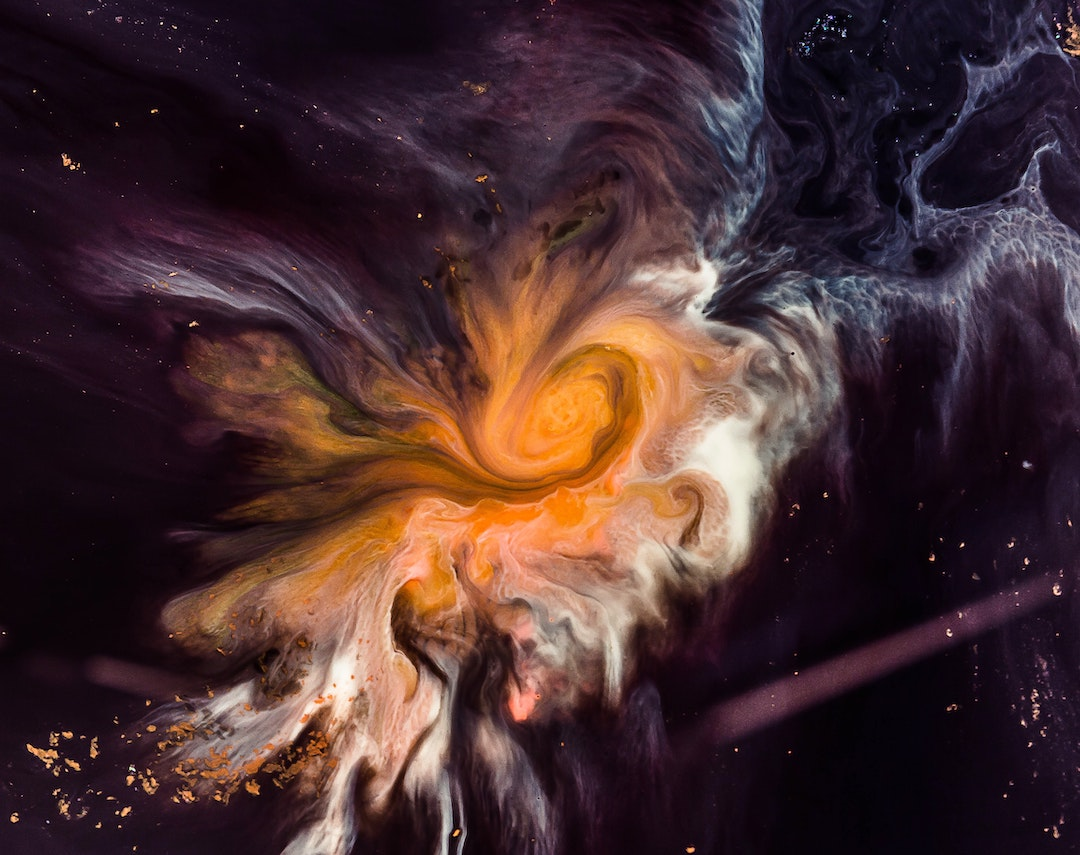

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('train2.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
data.shape

(8693, 14)

In [6]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Cleaning data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
# I can change the numerical, not the  strings 
# fillna with the mean with age
# fillna with zero can be used to fill the rest with zeros

In [11]:
mean_value = data['Age'].mean()
data['Age'].fillna(mean_value,inplace=True)

In [12]:
data['RoomService'].fillna(0,inplace=True)
data['FoodCourt'].fillna(0,inplace=True)
data['ShoppingMall'].fillna(0,inplace=True)
data['Spa'].fillna(0,inplace=True)
data['VRDeck'].fillna(0,inplace=True)

In [13]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [14]:
data= data.dropna()

In [15]:
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

### Analyze

In [16]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


Transported
True     3804
False    3755
Name: count, dtype: int64

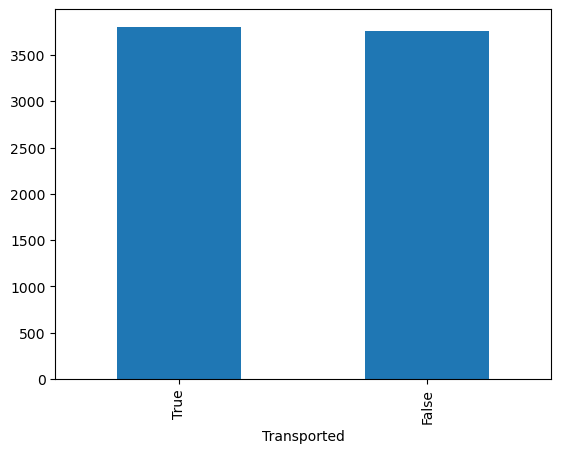

In [17]:
# the most people who have been transported 
data['Transported'].value_counts().plot(kind='bar')
data['Transported'].value_counts()

In [18]:
# I can groupby my object colunms to get a better understand of this 
grouped = ['HomePlanet','CryoSleep','Destination','VIP','Transported']
data.groupby(by=grouped).size().to_frame().sort_values(by=0,ascending=False)

0
HomePlanet CryoSleep Destination   VIP   Transported      
Earth      False     TRAPPIST-1e   False False        1449
                                         True          630
Mars       False     TRAPPIST-1e   False False         565
           True      TRAPPIST-1e   False True          469
Earth      True      TRAPPIST-1e   False True          468
Europa     True      TRAPPIST-1e   False True          405
                     55 Cancri e   False True          391
           False     TRAPPIST-1e   False False         364
Earth      True      TRAPPIST-1e   False False         283
           False     55 Cancri e   False False         264
Europa     False     TRAPPIST-1e   False True          246
Earth      True      PSO J318.5-22 False True          223
           False     PSO J318.5-22 False False         213
Europa     False     55 Cancri e   False False         210
Mars       False     TRAPPIST-1e   False True          210
Earth      False     55 Cancri e   False True          172
           True      55 Cancri e   False True          147
Europa     False     55 Cancri e   False True          138
Earth      True      PSO J318.5-22 False False         108
           False     PSO J318.5-22 False True          102
Mars       True      55 Cancri e   False True           68
           False     55 Cancri e   False False          66
           True      TRAPPIST-1e   False False          51
           False     TRAPPIST-1e   True  False          46
Earth      True      55 Cancri e   False False          42
Mars       False     55 Cancri e   False True           39
Europa     False     55 Cancri e   True  False          33
                     TRAPPIST-1e   True  False          22
                                         True           22
Mars       False     PSO J318.5-22 False False          17
Europa     False     55 Cancri e   True  True           13
           True      55 Cancri e   True  True           11
Mars       True      PSO J318.5-22 False True            9
           False     PSO J318.5-22 False True            9
Europa     True      TRAPPIST-1e   True  True            9
                     PSO J318.5-22 False True            9
Mars       False     TRAPPIST-1e   True  True            7
Europa     True      TRAPPIST-1e   False False           7
Mars       False     PSO J318.5-22 True  False           6
Europa     False     PSO J318.5-22 True  True            5
                                         False           4
Mars       False     PSO J318.5-22 True  True            2
           True      55 Cancri e   False False           2
Europa     True      55 Cancri e   False False           2
Mars       True      PSO J318.5-22 False False           1

In [19]:
transported = data[data['Transported']==True]
not_transported = data[data['Transported']==False]

In [20]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [21]:
grouped = ['HomePlanet','CryoSleep','Destination','VIP','Transported']
transported.groupby(by=grouped).size().to_frame().sort_values(by=0,ascending=False)

0
HomePlanet CryoSleep Destination   VIP   Transported     
Earth      False     TRAPPIST-1e   False True         630
Mars       True      TRAPPIST-1e   False True         469
Earth      True      TRAPPIST-1e   False True         468
Europa     True      TRAPPIST-1e   False True         405
                     55 Cancri e   False True         391
           False     TRAPPIST-1e   False True         246
Earth      True      PSO J318.5-22 False True         223
Mars       False     TRAPPIST-1e   False True         210
Earth      False     55 Cancri e   False True         172
           True      55 Cancri e   False True         147
Europa     False     55 Cancri e   False True         138
Earth      False     PSO J318.5-22 False True         102
Mars       True      55 Cancri e   False True          68
           False     55 Cancri e   False True          39
Europa     False     TRAPPIST-1e   True  True          22
                     55 Cancri e   True  True          13
           True      55 Cancri e   True  True          11
                     PSO J318.5-22 False True           9
                     TRAPPIST-1e   True  True           9
Mars       False     PSO J318.5-22 False True           9
           True      PSO J318.5-22 False True           9
           False     TRAPPIST-1e   True  True           7
Europa     False     PSO J318.5-22 True  True           5
Mars       False     PSO J318.5-22 True  True           2

In [22]:
grouped = ['HomePlanet','CryoSleep','Destination','VIP','Transported']
not_transported.groupby(by=grouped).size().to_frame().sort_values(by=0,ascending=False)

0
HomePlanet CryoSleep Destination   VIP   Transported      
Earth      False     TRAPPIST-1e   False False        1449
Mars       False     TRAPPIST-1e   False False         565
Europa     False     TRAPPIST-1e   False False         364
Earth      True      TRAPPIST-1e   False False         283
           False     55 Cancri e   False False         264
                     PSO J318.5-22 False False         213
Europa     False     55 Cancri e   False False         210
Earth      True      PSO J318.5-22 False False         108
Mars       False     55 Cancri e   False False          66
           True      TRAPPIST-1e   False False          51
           False     TRAPPIST-1e   True  False          46
Earth      True      55 Cancri e   False False          42
Europa     False     55 Cancri e   True  False          33
                     TRAPPIST-1e   True  False          22
Mars       False     PSO J318.5-22 False False          17
Europa     True      TRAPPIST-1e   False False           7
Mars       False     PSO J318.5-22 True  False           6
Europa     False     PSO J318.5-22 True  False           4
           True      55 Cancri e   False False           2
Mars       True      55 Cancri e   False False           2
                     PSO J318.5-22 False False           1

HomePlanet
Earth     1742
Europa    1249
Mars       813
Name: count, dtype: int64

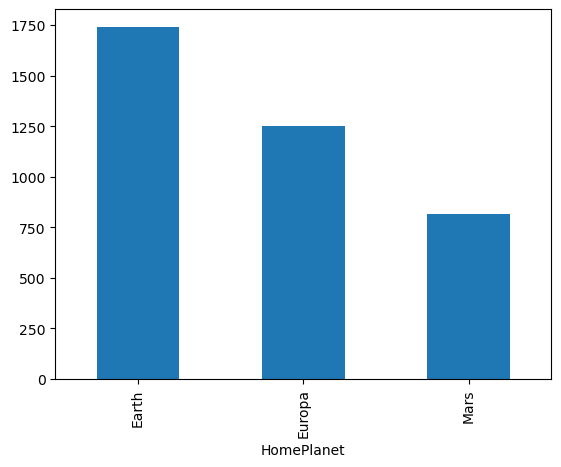

In [23]:
# can i create a visual that showcase the transported vs the not transported by planet 
transported['HomePlanet'].value_counts().plot(kind='bar')
transported['HomePlanet'].value_counts()

HomePlanet
Earth     2359
Mars       754
Europa     642
Name: count, dtype: int64

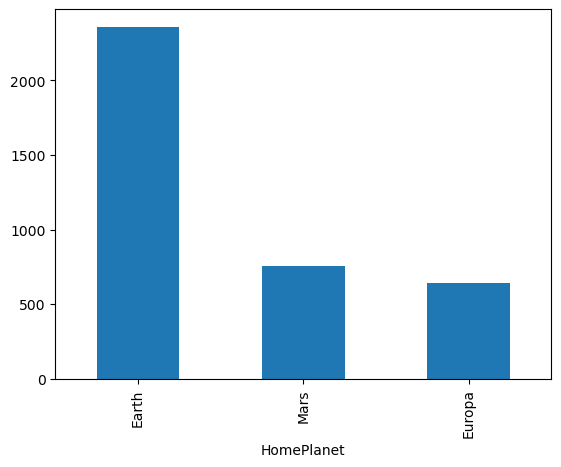

In [24]:
not_transported['HomePlanet'].value_counts().plot(kind='bar')
not_transported['HomePlanet'].value_counts()

In [25]:
# based on the planets,what % were transported

In [26]:
# total earth 
total_earth = 1742 +  2359
total_mars = 754 + 813
total_europa = 642 + 1249

In [27]:
percentage_transported_Earth = 1742 / total_earth * 100
percentage_transported_Mars = 813 / total_mars * 100
percentage_transported_europa = 1249 / total_europa * 100

In [28]:
round(percentage_transported_Earth,2)

42.48

In [29]:
round(percentage_transported_europa,2)

66.05

In [30]:
round(percentage_transported_Mars,2)

51.88

In [31]:
percentage_not_transported_Earth = round(2349 / total_earth * 100,2)
percentage_not_transported_Mars = round(754 / total_mars * 100,2)
percentage_not_transported_europa = round(642 / total_europa * 100,2)

In [32]:
percentage_not_transported_Earth

57.28

In [33]:
percentage_not_transported_europa

33.95

In [34]:
percentage_not_transported_Mars

48.12

Transported and Not Transported % based on Planet

Earth 
Transported = 42.48%
Not Transported = 57.28%

Mars
Transported = 51.88%
Not Transported = 48.12%

Europa
Transported = 66.05%
Not Transported = 33.95%

In [35]:
#Goal is to see if someone is transported or not
#We need to:

#encode my object
#my data needs to scaled
#drop columns that are not needed (feature selection)
#Maybe feature engineering is needed, try added together the numercial to understand the monetary power of someone

In [36]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Homeplanet_encode'] = lb.fit_transform(data['HomePlanet'])
data['CryoSleoop_encode'] = lb.fit_transform(data['CryoSleep'])
data['Destiation_encode'] = lb.fit_transform(data['Destination'])
data['VIP_enocde'] = lb.fit_transform(data['VIP'])

C:\Users\reece\AppData\Local\Temp\ipykernel_32620\2115606936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Homeplanet_encode'] = lb.fit_transform(data['HomePlanet'])
C:\Users\reece\AppData\Local\Temp\ipykernel_32620\2115606936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CryoSleoop_encode'] = lb.fit_transform(data['CryoSleep'])
C:\Users\reece\AppData\Local\Temp\ipykernel_32620\2115606936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [37]:
data= data.drop(columns=['PassengerId','Cabin','Name'])

In [38]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Homeplanet_encode,CryoSleoop_encode,Destiation_encode,VIP_enocde
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,2,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,2,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,2,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,2,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,1
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,1,0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,2,0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0,0


In [39]:
# Feature engineering
types_of_customers = ['low','medium','high']
data['total_cost_per_customers'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']

In [40]:
data['total_cost_per_customers'].describe()

count     7559.000000
mean      1445.178330
std       2803.573143
min          0.000000
25%          0.000000
50%        717.000000
75%       1443.500000
max      35987.000000
Name: total_cost_per_customers, dtype: float64

In [41]:
data['types_of_customers'] = data['total_cost_per_customers'].apply(lambda x: 'High' if x > 1443.500 else 
                                                                    ('Medium' if 717.000 < x < 1443.500 else 'low'))

In [42]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Homeplanet_encode,CryoSleoop_encode,Destiation_encode,VIP_enocde,total_cost_per_customers,types_of_customers
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,2,0,0.0,low
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,2,0,736.0,Medium
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,2,1,10383.0,High
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,2,0,5176.0,High
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,2,0,1091.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,1,8536.0,High
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,1,0,0.0,low
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,0,0,2,0,1873.0,High
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0,0,4637.0,High


In [43]:
data = data.drop(columns=['HomePlanet','CryoSleep','Destination','VIP'])

In [44]:
data['types_of_customers_encode'] = lb.fit_transform(data['types_of_customers'])

In [45]:
data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Homeplanet_encode,CryoSleoop_encode,Destiation_encode,VIP_enocde,total_cost_per_customers,types_of_customers,types_of_customers_encode
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,2,0,0.0,low,2
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,2,0,736.0,Medium,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,2,1,10383.0,High,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,2,0,5176.0,High,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0,0,2,0,1091.0,Medium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,1,8536.0,High,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,0,1,1,0,0.0,low,2
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,0,0,2,0,1873.0,High,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0,0,4637.0,High,0


In [46]:
data = data.drop(columns='types_of_customers')

In [47]:
data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Homeplanet_encode,CryoSleoop_encode,Destiation_encode,VIP_enocde,total_cost_per_customers,types_of_customers_encode
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,2,0,0.0,2
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,2,0,736.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,2,1,10383.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,2,0,5176.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0,0,2,0,1091.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,1,8536.0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,0,1,1,0,0.0,2
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,0,0,2,0,1873.0,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,1,0,0,0,4637.0,0


In [48]:
# feature importance 
y = data['Transported']
X = data.drop(columns=['Transported'])

In [49]:
# simple regression model with statsmodels
import statsmodels.api as sm
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Transported   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     346.8
Date:                Thu, 22 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:43:54   Log-Likelihood:                -3939.9
No. Observations:                7559   AIC:                             7904.
Df Residuals:                    7547   BIC:                             7987.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [50]:
data.corr(numeric_only=False)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Homeplanet_encode,CryoSleoop_encode,Destiation_encode,VIP_enocde,total_cost_per_customers,types_of_customers_encode
Age,1.000000,0.074901,0.129870,0.041681,0.118641,0.098034,-0.078250,0.134107,-0.081027,-0.006946,0.093809,0.187071,-0.239802
RoomService,0.074901,1.000000,-0.013449,0.057811,0.009894,-0.026836,-0.244713,0.226737,-0.255709,0.055036,0.034796,0.222594,-0.357651
FoodCourt,0.129870,-0.013449,1.000000,-0.012197,0.214954,0.226708,0.049384,0.070076,-0.208751,-0.111611,0.124045,0.751301,-0.379529
ShoppingMall,0.041681,0.057811,-0.012197,1.000000,0.022250,-0.002719,0.011073,0.113789,-0.229534,0.021488,0.018491,0.214252,-0.300550
Spa,0.118641,0.009894,0.214954,0.022250,1.000000,0.157884,-0.216565,0.055043,-0.201741,-0.055687,0.058569,0.593319,-0.342189
VRDeck,0.098034,-0.026836,0.226708,-0.002719,0.157884,1.000000,-0.207821,0.040490,-0.199274,-0.073369,0.124428,0.586726,-0.339871
Transported,-0.078250,-0.244713,0.049384,0.011073,-0.216565,-0.207821,1.000000,0.114734,0.467912,-0.113681,-0.037456,-0.193545,0.357905
Homeplanet_encode,0.134107,0.226737,0.070076,0.113789,0.055043,0.040490,0.114734,1.000000,0.081504,0.039048,0.131871,0.152747,-0.150254
CryoSleoop_encode,-0.081027,-0.255709,-0.208751,-0.229534,-0.201741,-0.199274,0.467912,0.081504,1.000000,-0.093871,-0.080391,-0.384833,0.674564
Destiation_encode,-0.006946,0.055036,-0.111611,0.021488,-0.055687,-0.073369,-0.113681,0.039048,-0.093871,1.000000,-0.040243,-0.099549,-0.053646


In [51]:
# lets use feature importance with certain algorthims 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
y = data['Transported']
X = data.drop(columns=['Transported'])
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
log = LogisticRegression()
log.fit(X_train,y_train)
log.score(X_train,y_train)

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7768565884635739

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_log = cross_val_score(log,X_train,y_train,cv=5)
cross_val_log

C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\reece\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.77248677, 0.78130511, 0.78218695, 0.77425044, 0.77316858])

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
cross_val_tree = cross_val_score(tree,X_train,y_train)
print(cross_val_tree)

0.9356147468689363
[0.71340388 0.75837743 0.75220459 0.71957672 0.72285966]


In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
cross_val_knn = cross_val_score(knn,X_train,y_train)
print(cross_val_knn)

0.818133709648968
[0.73368607 0.76455026 0.77601411 0.76014109 0.75728155]


In [55]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
cross_val_rf = cross_val_score(rf,X_train,y_train)
print(cross_val_rf)

0.9356147468689363
[0.74955908 0.79541446 0.78924162 0.77248677 0.7678729 ]


In [56]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
print(gb.score(X_train,y_train))
cross_val_gb = cross_val_score(gb,X_train,y_train)
print(cross_val_gb)

0.8066678426530253
[0.77689594 0.78924162 0.79541446 0.78218695 0.77934687]


In [57]:
# feature importance 
tree.feature_importances_

array([0.11152099, 0.05831478, 0.11622884, 0.08853272, 0.10139528,
       0.0802727 , 0.05190471, 0.01081197, 0.02049149, 0.0027895 ,
       0.35642285, 0.00131419])

In [58]:
features_rf = rf.feature_importances_
column_names = X.columns

In [59]:
feature_importance_dict_tree = dict(zip(column_names,tree.feature_importances_))

In [60]:
feature_importance_dict_rf = dict(zip(column_names,rf.feature_importances_))

In [61]:
feature_importance_dict_tree

{'Age': 0.11152098754046051,
 'RoomService': 0.05831478214709847,
 'FoodCourt': 0.11622884053670364,
 'ShoppingMall': 0.08853272148834751,
 'Spa': 0.10139527666902377,
 'VRDeck': 0.08027269597352005,
 'Homeplanet_encode': 0.051904705736624195,
 'CryoSleoop_encode': 0.010811965601416972,
 'Destiation_encode': 0.020491490150867948,
 'VIP_enocde': 0.002789502514792309,
 'total_cost_per_customers': 0.3564228464966652,
 'types_of_customers_encode': 0.0013141851444792674}

In [62]:
feature_importance_dict_rf

{'Age': 0.14923605029153938,
 'RoomService': 0.08987918406380187,
 'FoodCourt': 0.09998213725556357,
 'ShoppingMall': 0.0813329395160709,
 'Spa': 0.10537018551180441,
 'VRDeck': 0.08980655315244328,
 'Homeplanet_encode': 0.054178848065778086,
 'CryoSleoop_encode': 0.06889388551306068,
 'Destiation_encode': 0.0247233691729942,
 'VIP_enocde': 0.002733861247520555,
 'total_cost_per_customers': 0.1762765962291198,
 'types_of_customers_encode': 0.05758638998030332}

In [66]:
sorted_feature_importance_tree = sorted(feature_importance_dict_tree.items(),key=lambda x: x[1], reverse=True)
sorted_feature_importance_tree

[('total_cost_per_customers', 0.3564228464966652),
 ('FoodCourt', 0.11622884053670364),
 ('Age', 0.11152098754046051),
 ('Spa', 0.10139527666902377),
 ('ShoppingMall', 0.08853272148834751),
 ('VRDeck', 0.08027269597352005),
 ('RoomService', 0.05831478214709847),
 ('Homeplanet_encode', 0.051904705736624195),
 ('Destiation_encode', 0.020491490150867948),
 ('CryoSleoop_encode', 0.010811965601416972),
 ('VIP_enocde', 0.002789502514792309),
 ('types_of_customers_encode', 0.0013141851444792674)]

In [67]:
sorted_feature_importance_rf = sorted(feature_importance_dict_rf.items(), key=lambda x: x[1], reverse=True)
sorted_feature_importance_rf

[('total_cost_per_customers', 0.1762765962291198),
 ('Age', 0.14923605029153938),
 ('Spa', 0.10537018551180441),
 ('FoodCourt', 0.09998213725556357),
 ('RoomService', 0.08987918406380187),
 ('VRDeck', 0.08980655315244328),
 ('ShoppingMall', 0.0813329395160709),
 ('CryoSleoop_encode', 0.06889388551306068),
 ('types_of_customers_encode', 0.05758638998030332),
 ('Homeplanet_encode', 0.054178848065778086),
 ('Destiation_encode', 0.0247233691729942),
 ('VIP_enocde', 0.002733861247520555)]

In [68]:
feature_importance_dict_gb = dict(zip(column_names,gb.feature_importances_))
feature_importance_dict_gb

{'Age': 0.01520167845133585,
 'RoomService': 0.06177859701405311,
 'FoodCourt': 0.09985115272074108,
 'ShoppingMall': 0.07483151956439989,
 'Spa': 0.09415051985797916,
 'VRDeck': 0.08049303784636135,
 'Homeplanet_encode': 0.08475229374479334,
 'CryoSleoop_encode': 0.06113207522076393,
 'Destiation_encode': 0.010639258846978486,
 'VIP_enocde': 4.4761889549674495e-05,
 'total_cost_per_customers': 0.41712510484304427,
 'types_of_customers_encode': 0.0}

In [69]:
sorted_feature_importance_gb = sorted(feature_importance_dict_gb.items(), key=lambda x: x[1], reverse=True)
sorted_feature_importance_gb

[('total_cost_per_customers', 0.41712510484304427),
 ('FoodCourt', 0.09985115272074108),
 ('Spa', 0.09415051985797916),
 ('Homeplanet_encode', 0.08475229374479334),
 ('VRDeck', 0.08049303784636135),
 ('ShoppingMall', 0.07483151956439989),
 ('RoomService', 0.06177859701405311),
 ('CryoSleoop_encode', 0.06113207522076393),
 ('Age', 0.01520167845133585),
 ('Destiation_encode', 0.010639258846978486),
 ('VIP_enocde', 4.4761889549674495e-05),
 ('types_of_customers_encode', 0.0)]

In [70]:
log.feature_names_in_

array(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Homeplanet_encode', 'CryoSleoop_encode', 'Destiation_encode',
       'VIP_enocde', 'total_cost_per_customers',
       'types_of_customers_encode'], dtype=object)

In [71]:
log.coef_

array([[-5.23081017e-03, -1.05282660e-03,  1.37836627e-03,
         1.14189366e-03, -1.17276432e-03, -9.28878036e-04,
         6.79700904e-01,  6.50539479e-01, -3.89416757e-01,
        -3.34382582e-03, -6.34209029e-04,  3.71756301e-01]])

In [72]:
feature_names = X.columns
feature_names

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Homeplanet_encode', 'CryoSleoop_encode', 'Destiation_encode',
       'VIP_enocde', 'total_cost_per_customers', 'types_of_customers_encode'],
      dtype='object')

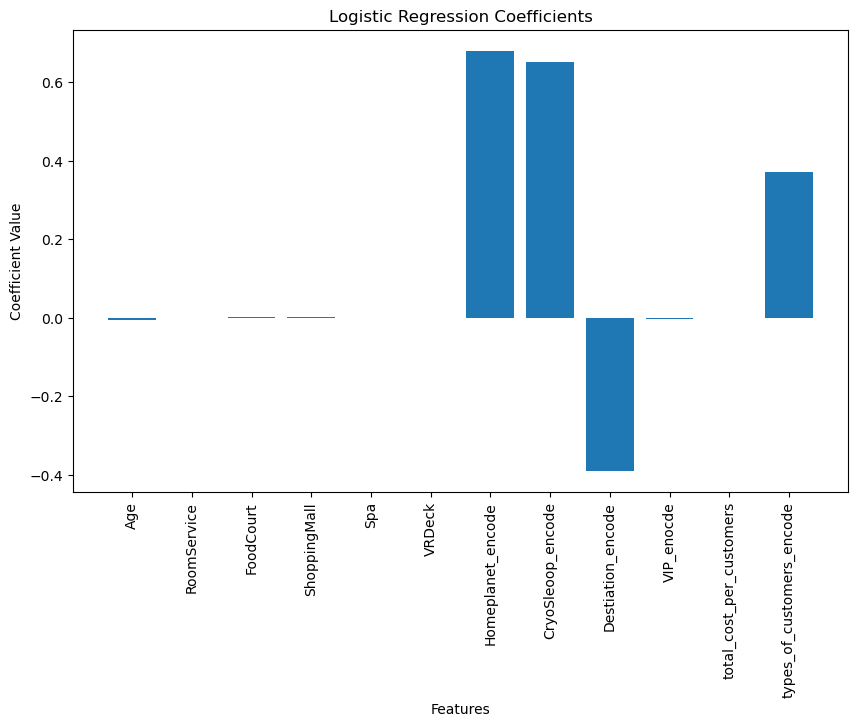

In [73]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(log.coef_[0])), log.coef_[0])
plt.xticks(rotation=90)
plt.xticks(range(len(log.coef_[0])), feature_names)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

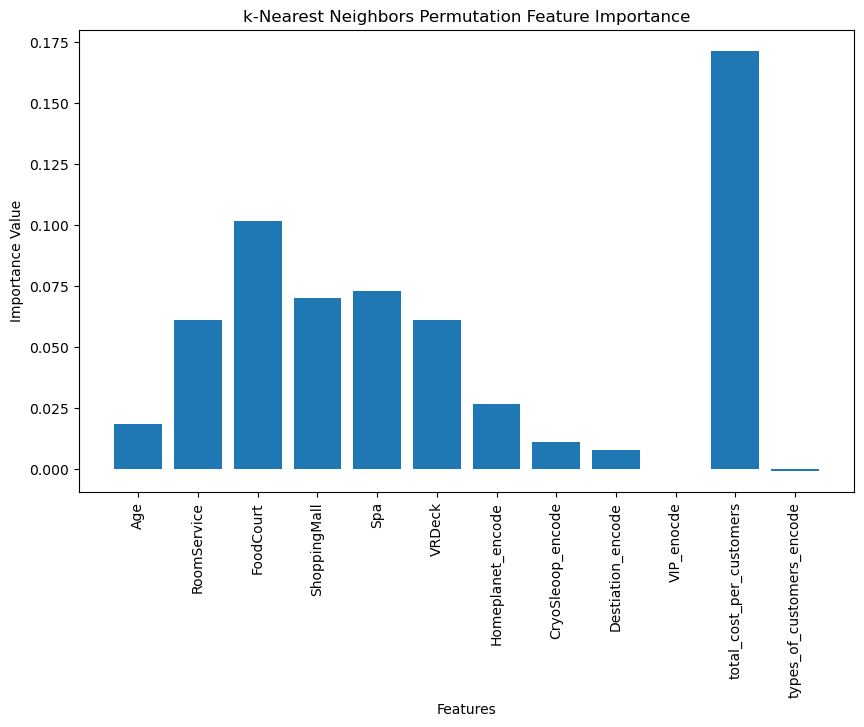

In [74]:
from sklearn.inspection import permutation_importance
knn_perm_importance = permutation_importance(knn, X, y, n_repeats=30, random_state=42)

# Plotting kNN Permutation Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(knn_perm_importance.importances_mean)), knn_perm_importance.importances_mean)
plt.xticks(rotation=90)
plt.xticks(range(len(knn_perm_importance.importances_mean)), feature_names)
plt.title('k-Nearest Neighbors Permutation Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Value')
plt.show()

In [75]:
# other techniques
# Chi-Squared Feature Selection

In [76]:
from sklearn.feature_selection import chi2,SelectKBest
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [77]:
X_train_fs,y_train_fs,fs = select_features(X_train,y_train,X_test)

Feature 0: 268.192828
Feature 1: 590851.566399
Feature 2: 85399.087672
Feature 3: 644.957195
Feature 4: 1083494.026667
Feature 5: 1061129.334027
Feature 6: 67.973902
Feature 7: 797.873057
Feature 8: 33.345681
Feature 9: 8.659724
Feature 10: 1137183.541026
Feature 11: 403.958850


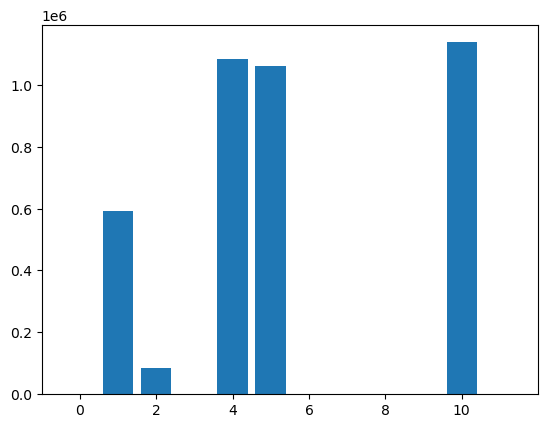

In [78]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

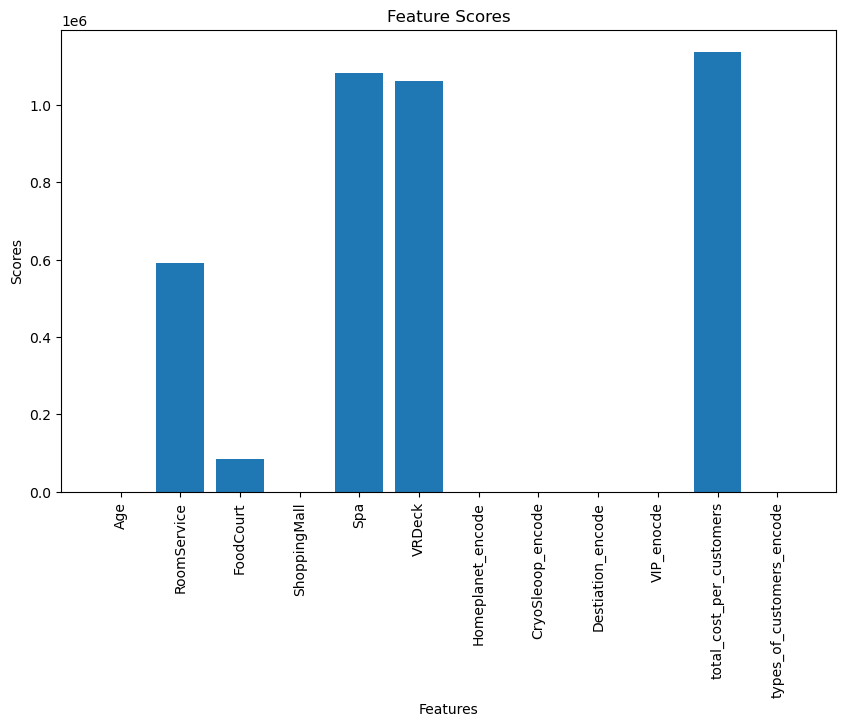

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(fs.scores_)), fs.scores_)
plt.xticks(range(len(fs.scores_)), feature_names, rotation=90)  # Set feature names as x-axis labels and rotate them by 90 degrees
plt.title('Feature Scores')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

In [80]:
# Mutual Information Feature Selection

In [81]:
from sklearn.feature_selection import chi2,SelectKBest
def select_features_mi(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [82]:
X_train_fs_mi, X_test_fs_mi, fs_mi = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 268.192828
Feature 1: 590851.566399
Feature 2: 85399.087672
Feature 3: 644.957195
Feature 4: 1083494.026667
Feature 5: 1061129.334027
Feature 6: 67.973902
Feature 7: 797.873057
Feature 8: 33.345681
Feature 9: 8.659724
Feature 10: 1137183.541026
Feature 11: 403.958850


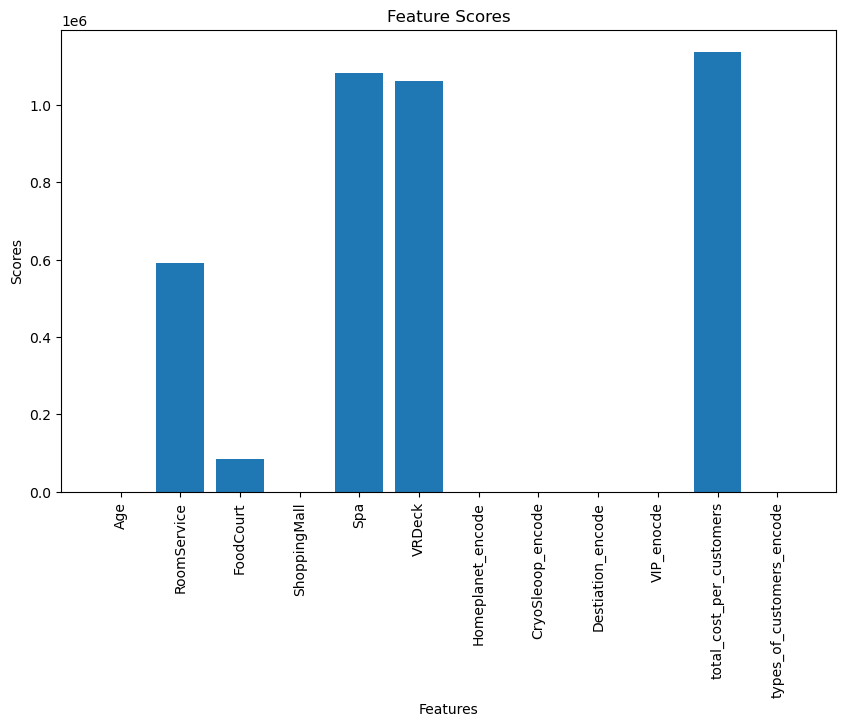

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(fs.scores_)), fs.scores_)
plt.xticks(range(len(fs.scores_)), feature_names, rotation=90)  # Set feature names as x-axis labels and rotate them by 90 degrees
plt.title('Feature Scores')
plt.xlabel('Features')
plt.ylabel('Scores')
plt.show()

In [84]:
# model building with feature selection 

In [85]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=4)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

# feature selection
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions

In [86]:
print(model.score(X_train_fs,y_train))
cross_val_log_fs = cross_val_score(model,X_train_fs,y_train,cv=5)
print(cross_val_log_fs)

0.768036690774387
[0.75837743 0.78218695 0.76719577 0.75573192 0.7749338 ]


In [88]:
model3 = DecisionTreeClassifier()
model3.fit(X_train_fs,y_train)
print(model3.score(X_train_fs,y_train))
cross_val_tree_fs = cross_val_score(model3,X_train_fs,y_train,cv=5)
print(cross_val_tree_fs)

0.9119774210619157
[0.7292769  0.73368607 0.76895944 0.72222222 0.73521624]


In [90]:
# Decisiontree overfitting
# lets use gridsearchcv 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':[3,4,5,6,7,8,9],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[2,4,6],
    'max_features':['sqrt','log2'],
    'max_leaf_nodes':[3,4,5,6,7]
}
grid_tree = GridSearchCV(model3,param_grid=param_grid,cv=5)
grid_tree.fit(X_train_fs,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6]})

In [91]:
grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features='log2', max_leaf_nodes=7,
                       min_samples_leaf=4, min_samples_split=4)

In [92]:
grid_tree.best_score_

0.7690945516188235

In [94]:
model3 = DecisionTreeClassifier(max_depth=6, max_features='log2', max_leaf_nodes=7,min_samples_leaf=4, min_samples_split=4)
model3.fit(X_train_fs,y_train)
print(model3.score(X_train_fs,y_train))
cross_val_tree_fs = cross_val_score(model3,X_train_fs,y_train,cv=5)
cross_val_tree_fs

0.7703298641735756


array([0.74250441, 0.75132275, 0.76190476, 0.75132275, 0.72197705])

In [96]:
print(model3.score(X_train_fs,y_train))
print(model3.score(X_test_fs,y_test))

0.7703298641735756
0.765079365079365


In [95]:
model4 = KNeighborsClassifier()
model4.fit(X_train_fs,y_train)
print(model4.score(X_train_fs,y_train))
cross_val_kneighbors_fs = cross_val_score(model4,X_train_fs,y_train,cv=5)
cross_val_kneighbors_fs

0.8144293526195097


array([0.7680776 , 0.78306878, 0.79100529, 0.7707231 , 0.75551633])

In [98]:
param_grid_knn = {
    'n_neighbors':[2,3,4,5,6],
    'n_neighbors':[7,8,9,10]
}
grid_neighbors = GridSearchCV(model4,param_grid=param_grid_knn,cv=5)
grid_neighbors.fit(X_train_fs,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 8, 9, 10]})

In [99]:
print(grid_neighbors.best_estimator_)
print(grid_neighbors.best_score_)

KNeighborsClassifier(n_neighbors=9)
0.7763241912109226


In [100]:
model4 = KNeighborsClassifier(n_neighbors=9)
model4.fit(X_train_fs,y_train)
print(model4.score(X_train_fs,y_train))
cross_val_kneighbors_fs = cross_val_score(model4,X_train_fs,y_train,cv=5)
cross_val_kneighbors_fs

0.8036690774387018


array([0.76895944, 0.79012346, 0.79100529, 0.77336861, 0.75816417])

In [101]:
print(model4.score(X_train_fs,y_train))
print(model4.score(X_test_fs,y_test))

0.8036690774387018
0.792063492063492


In [111]:
model5 = RandomForestClassifier()
model5.fit(X_train_fs,y_train)
print(model5.score(X_train_fs,y_train))
cross_val_rf_fs = cross_val_score(model5,X_train_fs,y_train,cv=5)
cross_val_rf_fs

0.9119774210619157


array([0.76719577, 0.78924162, 0.79717813, 0.76719577, 0.76963813])

In [105]:
param_grid_rf = {
    'n_estimators':[5,6,7,8,9,10,11,12],
    'n_estimators':[10,20,30,40,50],
    'max_depth':[2,3,4,5,6],
    'max_depth':[7,8,9,10],
    'min_samples_leaf':[4,5,6,7],
    'max_features':['sqrt','log2', None]
}
grid_rf = GridSearchCV(model5,param_grid=param_grid_rf,cv=5)
grid_rf.fit(X_train_fs,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [4, 5, 6, 7],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [106]:
grid_rf.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=5,
                       n_estimators=50)

In [107]:
grid_rf.best_score_

0.7904383642247719

In [128]:
model5 = RandomForestClassifier(max_depth=9, max_features='log2', min_samples_leaf=5,n_estimators=50)
model5.fit(X_train_fs,y_train)
print(model5.score(X_train_fs,y_train))
cross_val_rf_fs = cross_val_score(model5,X_train_fs,y_train,cv=5)
cross_val_rf_fs

0.8133709648968072


array([0.78042328, 0.7989418 , 0.79188713, 0.78395062, 0.78375993])

In [109]:
print(model5.score(X_train_fs,y_train))
print(model5.score(X_test_fs,y_test))

0.8114305874051861
0.7962962962962963


In [126]:
model6 = GradientBoostingClassifier()
model6.fit(X_train_fs,y_train)
print(model5.score(X_train_fs,y_train))
cross_val_gb_fs = cross_val_score(model5,X_train_fs,y_train,cv=5)
cross_val_gb_fs

0.8112541894514024


array([0.77954145, 0.80511464, 0.79100529, 0.78395062, 0.78464254])

In [129]:
# LR
print(model.score(X_test_fs,y_test))

0.7777777777777778


In [130]:
#Decisiontree
print(model3.score(X_test_fs,y_test))

0.765079365079365


In [131]:
#Kneighbors
print(model4.score(X_test_fs,y_test))

0.792063492063492


In [132]:
#RandomForestClassifier
print(model5.score(X_test_fs,y_test))

0.7957671957671958


In [133]:
# GradientBoosting
print(model6.score(X_test_fs,y_test))

0.7973544973544974


In [ ]:
# GradientBoost best model